In [151]:
#importing necessary packages
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
from sklearn import decomposition
%matplotlib inline
sns.set(color_codes=True)

In [140]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")
y_train = train_data["SalePrice"]
#del train_data["SalePrice"]

"Changes typr of MSSubClass,YearBuilt to string from integer"
train_data['MSSubClass'] = train_data['MSSubClass'].astype(basestring)
#train_data['YearBuilt'] = train_data['YearBuilt'].astype(basestring)    

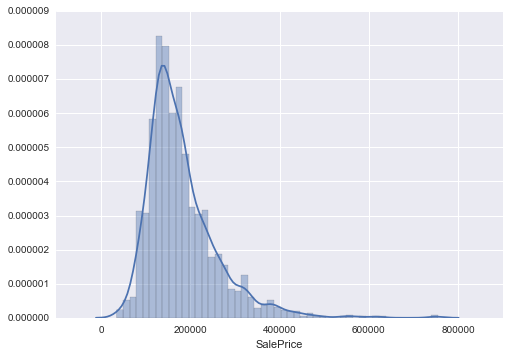

In [3]:
sns.distplot(y_train)

In [7]:
train_data.count()

Id               1460
MSSubClass       1460
MSZoning         1460
LotFrontage      1201
LotArea          1460
Street           1460
Alley              91
LotShape         1460
LandContour      1460
Utilities        1460
LotConfig        1460
LandSlope        1460
Neighborhood     1460
Condition1       1460
Condition2       1460
BldgType         1460
HouseStyle       1460
OverallQual      1460
OverallCond      1460
YearBuilt        1460
YearRemodAdd     1460
RoofStyle        1460
RoofMatl         1460
Exterior1st      1460
Exterior2nd      1460
MasVnrType       1452
MasVnrArea       1452
ExterQual        1460
ExterCond        1460
Foundation       1460
                 ... 
HalfBath         1460
BedroomAbvGr     1460
KitchenAbvGr     1460
KitchenQual      1460
TotRmsAbvGrd     1460
Functional       1460
Fireplaces       1460
FireplaceQu       770
GarageType       1379
GarageYrBlt      1379
GarageFinish     1379
GarageCars       1460
GarageArea       1460
GarageQual       1379
GarageCond

In [4]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [5]:
train_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000


Important Features
    LotArea
    Utilities
    Neighborhood - Categorical - Box plot to get its distribution.
    -Condition1 - check later ? not required I guess, better to include MSSubClass or MSZoning
    HouseStyle
    -BldgType
    OverallQual
    OverallCond
    YearRemodAdd
    -Exterior1st
    -Exterior2st
    ExterCond
    Check basements
    TotFlrSF - 1stFlrSF + 2ndFlrSF
    Heating
    HeatingQC
    YearBuilt
    GarageCars - inplace of GarageArea
    - GarageType
    Porsh = OpenPorchSF + EnclosedPorch + 3SsnPorch + ScreenPorch
    PoolArea
    MiscVal
    - MoSold + YrSold
    -SaleType
    SaleCondition
    MSSubClass ?
    MSZoning ?
    
    
    
Replace     

In [48]:
#Extracting important features based on intuition
Xtrain=train_data[['LotArea','Utilities','Neighborhood','HouseStyle','OverallQual','OverallCond','YearRemodAdd','ExterCond',
            'Heating','HeatingQC','GarageCars','PoolArea','MiscVal','SaleCondition','YearBuilt']]
Xtrain.head()
#TotFlrSF - 1stFlrSF + 2ndFlrSF
#'Check basements'

,LotArea,Utilities,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,ExterCond,Heating,HeatingQC,GarageCars,PoolArea,MiscVal,SaleCondition,YearBuilt
0,8450,AllPub,CollgCr,2Story,7,5,2003,TA,GasA,Ex,2,0,0,Normal,2003
1,9600,AllPub,Veenker,1Story,6,8,1976,TA,GasA,Ex,2,0,0,Normal,1976
2,11250,AllPub,CollgCr,2Story,7,5,2002,TA,GasA,Ex,2,0,0,Normal,2001
3,9550,AllPub,Crawfor,2Story,7,5,1970,TA,GasA,Gd,3,0,0,Abnorml,1915
4,14260,AllPub,NoRidge,2Story,8,5,2000,TA,GasA,Ex,3,0,0,Normal,2000


In [20]:
'''
Feature engineering plan 
TotFlrSF - 1stFlrSF + 2ndFlrSF
Porsh = OpenPorchSF + EnclosedPorch + 3SsnPorch + ScreenPorch
'''
Xtrain['TotFlrSF'] = train_data['1stFlrSF'] + train_data['2ndFlrSF']
Xtrain['TotPorsh'] = train_data['OpenPorchSF']+ train_data['EnclosedPorch'] + train_data['3SsnPorch'] + train_data['ScreenPorch']
Xtrain.count()

C:\Users\venkataprudhviraj\AppData\Local\Enthought\Canopy\User\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\venkataprudhviraj\AppData\Local\Enthought\Canopy\User\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


LotArea          1460
Utilities        1460
Neighborhood     1460
HouseStyle       1460
OverallQual      1460
OverallCond      1460
YearRemodAdd     1460
ExterCond        1460
Heating          1460
HeatingQC        1460
GarageCars       1460
PoolArea         1460
MiscVal          1460
SaleCondition    1460
TotFlrSF         1460
TotPorsh         1460
dtype: int64

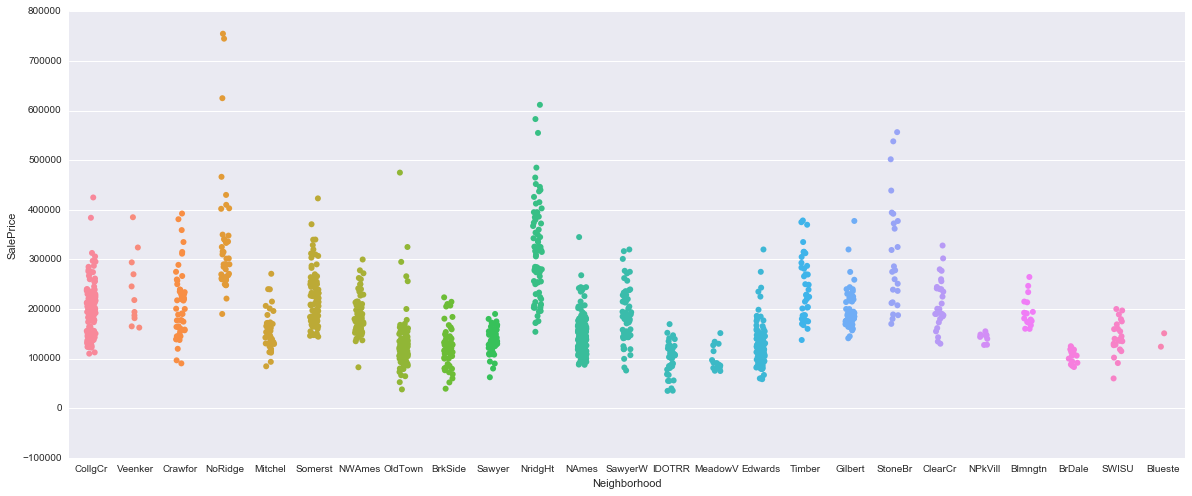

In [39]:
#plt.figure(figsize=(45,10))
mpl.rcParams['figure.figsize'] = (20.0, 8.0)
sns.stripplot(x="Neighborhood", y="SalePrice", data=train_data, jitter=True,size=6);

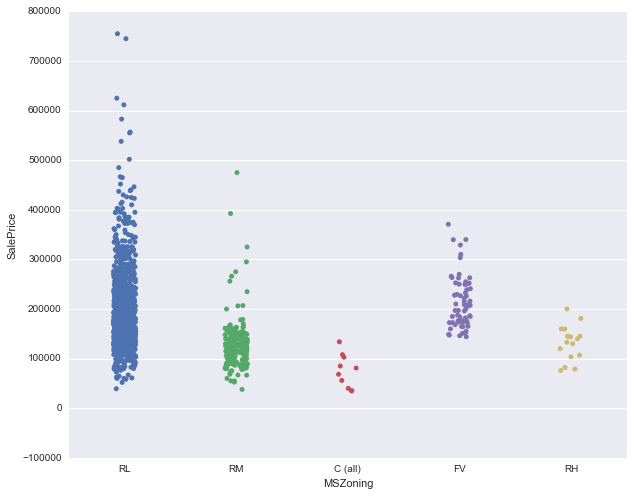

In [43]:
#mpl.rcParams['figure.figsize'] = (10.0, 8.0)
sns.stripplot(x="MSZoning", y="SalePrice", data=train_data, jitter=True);

In [44]:
train_data['MSZoning'].unique()

array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object)

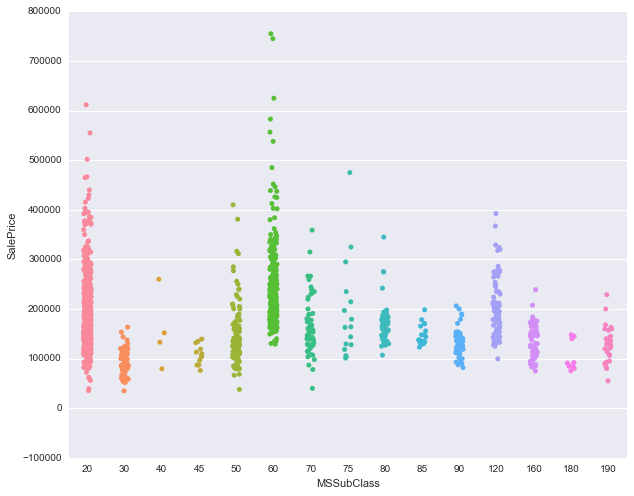

In [47]:
sns.stripplot(x="MSSubClass", y="SalePrice", data=train_data, jitter=True);

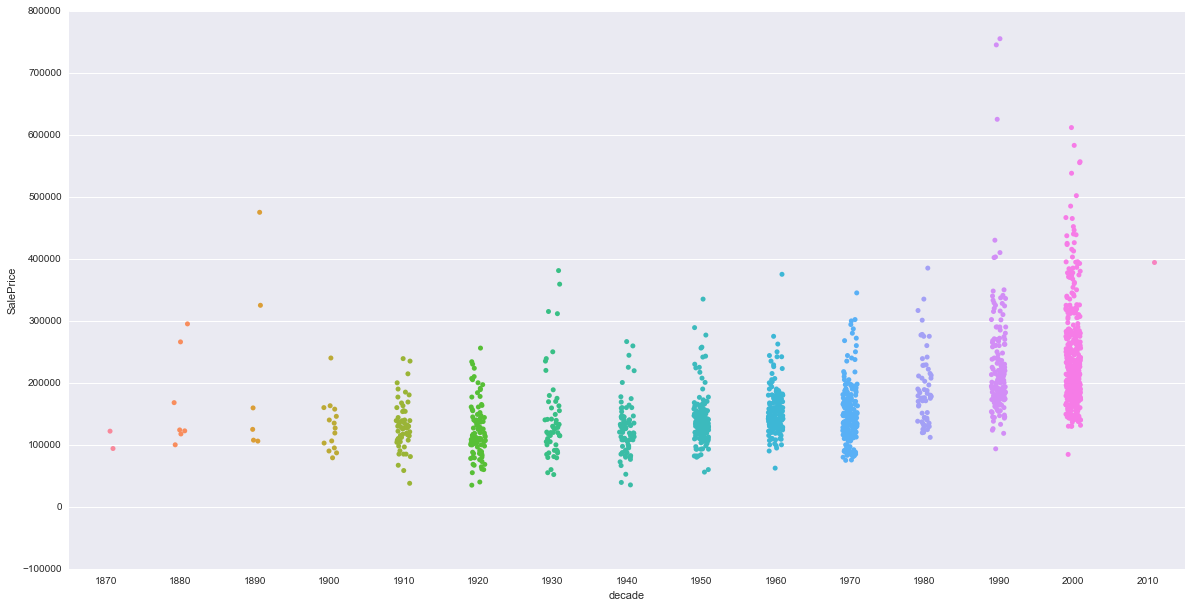

In [124]:
mpl.rcParams['figure.figsize'] = (20.0, 10.0)
train_data['decade'] = (train_data['YearBuilt']/10).astype(int) *10
#yearbuildbDecade.head
sns.stripplot(x="decade", y="SalePrice", data=train_data, jitter=True);

C:\Users\venkataprudhviraj\AppData\Local\Enthought\Canopy\User\lib\site-packages\seaborn\categorical.py:2125: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


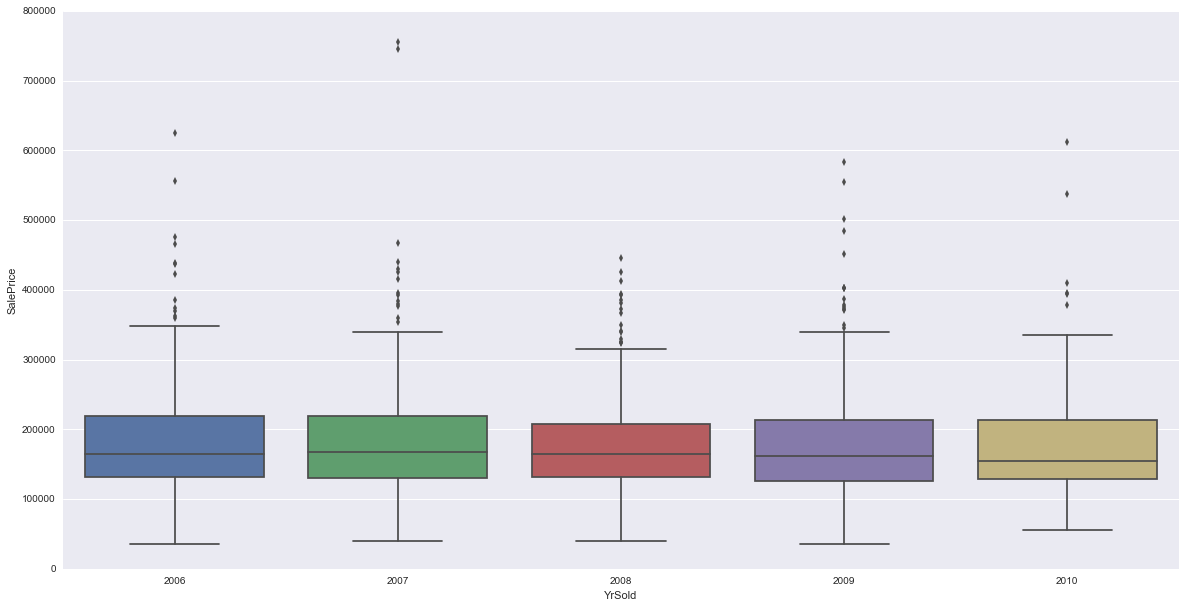

In [122]:
#mpl.rcParams['figure.figsize'] = (20.0, 10.0)
#train_data['TimeSold'] = (train_data['YrSold']/10).astype(int) *10
#print train_data['YrSold']
#print train_data['MoSold'] 
#print train_data['TimeSold']
sns.boxplot(train_data['SalePrice'], groupby=train_data['YrSold'])

In [106]:
#from below commend we can see that training data has 81 columns and 1460 rows.
train_data.shape
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null object
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-

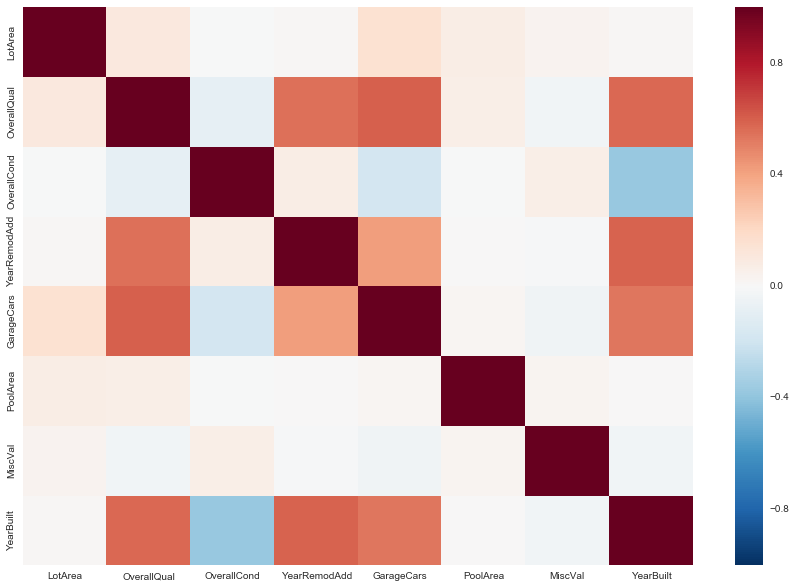

In [127]:
mpl.rcParams['figure.figsize'] = (15.0, 10.0)
corr = Xtrain.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
#Below graph shows lots of these features are correlated.

In [128]:
#Converting categorical variables to continious by creating dummy variables.
Xtrain.head()

,LotArea,Utilities,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,ExterCond,Heating,HeatingQC,GarageCars,PoolArea,MiscVal,SaleCondition,YearBuilt
0,8450,AllPub,CollgCr,2Story,7,5,2003,TA,GasA,Ex,2,0,0,Normal,2003
1,9600,AllPub,Veenker,1Story,6,8,1976,TA,GasA,Ex,2,0,0,Normal,1976
2,11250,AllPub,CollgCr,2Story,7,5,2002,TA,GasA,Ex,2,0,0,Normal,2001
3,9550,AllPub,Crawfor,2Story,7,5,1970,TA,GasA,Gd,3,0,0,Abnorml,1915
4,14260,AllPub,NoRidge,2Story,8,5,2000,TA,GasA,Ex,3,0,0,Normal,2000


In [149]:
def getdummies(df,col):
    dummy = pd.get_dummies(df[col],prefix=col)
    del df[col]
    return df.join(dummy)

Xtrain=train_data[['LotArea','Utilities','Neighborhood','HouseStyle','OverallQual','OverallCond','YearRemodAdd','ExterCond',
            'Heating','HeatingQC','GarageCars','PoolArea','MiscVal','SaleCondition','YearBuilt']]
#Xtrain = getdummies(Xtrain,'HouseStyle')
Xtrain.head()
categoricalFeatures = ['HouseStyle','Utilities','Neighborhood','ExterCond','Heating','SaleCondition','HeatingQC']
for col in categoricalFeatures:
    Xtrain = getdummies(Xtrain,col)
Xtrain.head()

,LotArea,OverallQual,OverallCond,YearRemodAdd,GarageCars,PoolArea,MiscVal,YearBuilt,HouseStyle_1.5Fin,HouseStyle_1.5Unf,...,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA
0,8450,7,5,2003,2,0,0,2003,0,0,...,0,0,0,1,0,1,0,0,0,0
1,9600,6,8,1976,2,0,0,1976,0,0,...,0,0,0,1,0,1,0,0,0,0
2,11250,7,5,2002,2,0,0,2001,0,0,...,0,0,0,1,0,1,0,0,0,0
3,9550,7,5,1970,3,0,0,1915,0,0,...,0,0,0,0,0,0,0,1,0,0
4,14260,8,5,2000,3,0,0,2000,0,0,...,0,0,0,1,0,1,0,0,0,0


In [63]:
unique_seriescount = train_data.apply(pd.Series.nunique)
#unique_seriescount
categorical_index = [x for x in range(len(unique_seriescount)) if unique_seriescount[x] <=10]
col_names = train_data.columns
categorical_col = [col_names[x] for x in categorical_index]
#categorical_numerical_col =


['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'RoofStyle',
 'RoofMatl',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageCars',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolArea',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'YrSold',
 'SaleType',
 'SaleCondition']

In [ ]:
#Distribution of categorical values in train_data


In [54]:
train_data_copy = train_data.copy(deep=True)
#train_data_copy.dropna()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition


In [ ]:
#Getting categorical values from a dataframe
def categorical_columns(df):
    if df.series.nunique() <= 10 and 

In [36]:
#below statements retrive all the names of numerical features in a pandas datafrme
numerical_cols = train_data.select_dtypes(include=['float64', 'int64']).columns
print len(numerical_cols)
numerical_cols

38


Index([u'Id', u'MSSubClass', u'LotFrontage', u'LotArea', u'OverallQual',
       u'OverallCond', u'YearBuilt', u'YearRemodAdd', u'MasVnrArea',
       u'BsmtFinSF1', u'BsmtFinSF2', u'BsmtUnfSF', u'TotalBsmtSF', u'1stFlrSF',
       u'2ndFlrSF', u'LowQualFinSF', u'GrLivArea', u'BsmtFullBath',
       u'BsmtHalfBath', u'FullBath', u'HalfBath', u'BedroomAbvGr',
       u'KitchenAbvGr', u'TotRmsAbvGrd', u'Fireplaces', u'GarageYrBlt',
       u'GarageCars', u'GarageArea', u'WoodDeckSF', u'OpenPorchSF',
       u'EnclosedPorch', u'3SsnPorch', u'ScreenPorch', u'PoolArea', u'MiscVal',
       u'MoSold', u'YrSold', u'SalePrice'],
      dtype='object')

In [37]:
#below statements retrive all the names of categorical features in a pandas datafrme
categorical_cols = train_data.select_dtypes(include=['object']).columns
print len(categorical_cols)
categorical_cols

43


Index([u'MSZoning', u'Street', u'Alley', u'LotShape', u'LandContour',
       u'Utilities', u'LotConfig', u'LandSlope', u'Neighborhood',
       u'Condition1', u'Condition2', u'BldgType', u'HouseStyle', u'RoofStyle',
       u'RoofMatl', u'Exterior1st', u'Exterior2nd', u'MasVnrType',
       u'ExterQual', u'ExterCond', u'Foundation', u'BsmtQual', u'BsmtCond',
       u'BsmtExposure', u'BsmtFinType1', u'BsmtFinType2', u'Heating',
       u'HeatingQC', u'CentralAir', u'Electrical', u'KitchenQual',
       u'Functional', u'FireplaceQu', u'GarageType', u'GarageFinish',
       u'GarageQual', u'GarageCond', u'PavedDrive', u'PoolQC', u'Fence',
       u'MiscFeature', u'SaleType', u'SaleCondition'],
      dtype='object')

In [ ]:
for col in categorical_cols:
    train_data.value_co

In [40]:
train_data['MSZoning']

0       RL
1       RL
2       RL
3       RL
4       RL
5       RL
6       RL
7       RL
8       RM
9       RL
10      RL
11      RL
12      RL
13      RL
14      RL
15      RM
16      RL
17      RL
18      RL
19      RL
20      RL
21      RM
22      RL
23      RM
24      RL
25      RL
26      RL
27      RL
28      RL
29      RM
        ..
1430    RL
1431    RL
1432    RL
1433    RL
1434    RL
1435    RL
1436    RL
1437    RL
1438    RM
1439    RL
1440    RL
1441    RM
1442    FV
1443    RL
1444    RL
1445    RL
1446    RL
1447    RL
1448    RL
1449    RM
1450    RL
1451    RL
1452    RM
1453    RL
1454    FV
1455    RL
1456    RL
1457    RL
1458    RL
1459    RL
Name: MSZoning, dtype: object

In [7]:
train_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000


In [30]:
train_data.select

<bound method DataFrame.select of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
5        6          50       RL         85.0    14115   Pave   NaN      IR1   
6        7          20       RL         75.0    10084   Pave   NaN      Reg   
7        8          60       RL          NaN    10382   Pave   NaN      IR1   
8        9          50       RM         51.0     6120   Pave   NaN      Reg   
9       10         190       RL         50.0     7420   Pave   NaN      Reg   
10      11          20       RL         70.0    11200   Pave   NaN      Reg   
11      12        

In [38]:
38+43

81

In [8]:
#we can see that train_data has 81  columns and 1460 rows
print train_data.shape

(1460, 81)


In [19]:
#categorical_cols = [col for col in train_data if train_data[col].unique > 1000]
#print categorical_cols
#print len(categorical_cols)
[len(train_data[col].unique) for col in train_data]

TypeError: object of type 'instancemethod' has no len()

In [20]:
train_data.value_counts

AttributeError: 'DataFrame' object has no attribute 'value_counts'